# Natural Language Processing
The use of natural language processing has exploded over the last decade. Appilcations that require machines to understand natural human speech patterns are abundant and substantial improvements in these systems has increased their utility.

<a id='Back'></a> <a id='Back1'></a> <a id='Back2'></a> <a id='Back3'></a> <a id='Back4'></a> <a id='Back5'></a> <a id='Back6'></a> <a id='Back7'></a> <a id='Back8'></a> <a id='Back9'></a> 
# Directory
<a id='Back10'></a> <a id='Back11'></a> <a id='Back12'></a> <a id='Back13'></a> <a id='Back14'></a>
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#prepare">Data Preparation</a></li>
    - <a href="#Step1">Step 1 Cleaning</a><br>
    - <a href="#Step2">Step 2 Processing</a><br>
    - <a href="#WC">WordCloud</a>
<li><a href="#Sent">Sentiment Analysis</a></li>
<li><a href="#LDA">LDA topic modelling</a></li>
    - <a href="#ft">Full Text</a><br>
    - <a href="#compare">Comparison</a>
<li><a href="#conclusions">Conclusion</a></li>
</ul>

# Introduction
<a id='intro'></a>
This project will focus on processing a set of documents, running a sentiment analysis of thise documents and then generating topic models of those documents. The documents we will be using will be student notes that the class HUDK4050 made last semester.



<a href="#Back">Back to the top</a>

<a id='prepare'></a>
# Data Preparation
Data processing, Feature extraction

<a href="#Back1">Back to the top</a>

In [290]:
import warnings
warnings.simplefilter('ignore')
import glob
import sys
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

path = '/Users/zhongyuanzhang/Desktop/Projects/Data Projects/Natural-Language-Processing/class-notes/'

## Import all document files and the list of weeks file

In [291]:
#Create a list of all the files
files = os.listdir(path)
files_csv = list(filter(lambda x: x[-4:]=='.csv' , files)) #contains only file name

In [292]:
#define an empty list for later addition
data_list = []
# use for loop to read the files
for file in  files_csv:
    data = pd.read_csv(path + file)
    data_list.append(data)

In [293]:
# Combine all the csv file
all_data = pd.concat(data_list)
all_data.shape
all_data.head()

,Key,Item Type,Publication Year,Author,Title,Publication Title,ISBN,ISSN,DOI,Url,...,Programming Language,Version,System,Code,Code Number,Section,Session,Committee,History,Legislative Body
0,VUSBL4SV,bookSection,2017.0,"Bergner, Yoav",Measurement and its Uses in Learning Analytics,The Handbook of Learning Analytics,978-0-9952408-0-3,NaN,NaN,http://solaresearch.org/hla-17/hla17-chapter1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DL5YWRHE,bookSection,2017.0,"Prinsloo, Paul; Slade, Sharon",Ethics and Learning Analytics: Charting the (U...,The Handbook of Learning Analytics,978-0-9952408-0-3,NaN,NaN,http://solaresearch.org/hla-17/hla17-chapter1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,XL5U3D85,bookSection,2017.0,"Brooks, Christopher; Thompson, Craig",Predictive Modelling in Teaching and Learning,The Handbook of Learning Analytics,978-0-9952408-0-3,NaN,NaN,http://solaresearch.org/hla-17/hla17-chapter1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,UQPELAFR,bookSection,2017.0,"Liu, Ren; Koedinger, Kenneth",Going Beyond Better Data Prediction to Create ...,The Handbook of Learning Analytics,978-0-9952408-0-3,NaN,NaN,http://solaresearch.org/hla-17/hla17-chapter1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FRSPRI7Y,journalArticle,2011.0,"Gelman, A; Niemi, J",Statistical graphics: making information clear...,Significance,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [294]:
# week and title imported
data_week_list=pd.read_csv('/Users/zhongyuanzhang/Desktop/Projects/Data Projects/Natural-Language-Processing/week-list.csv')
data_week_list.head()

,Title,week
0,Analyzing the Longitudinal K-12 Grading Histor...,7
1,Understanding Classrooms through Social Networ...,6
2,Why Students Should Own Their Educational Data,4
3,Knowledge tracing: Modeling the acquisition of...,14
4,Learning Analytics and Educational Data Mining...,2


In [295]:
# There's duplicated row
data_week_list.Title.drop_duplicates(keep='first',inplace=True)

<a id='Step1'></a>
## Step 1 - Clean the htlm tags from your text

Cleaning the meaningless marks<br>
<a href="#Back2">Back to the top</a>

In [296]:
all_data.reset_index(inplace=True)
all_data.Notes

0       <p>Measurement</p> <ul> <li>defining the const...
1       <p>Ethical issues:</p> <ul> <li>the location a...
2       <p>process, practice, challenges of using pred...
3       <p>Predictive VS explanatory model</p> <ul> <l...
4       <p>two decision</p> <ul> <li>who is your targe...
                              ...                        
3037    <p>Model students' changing knowledge state du...
3038                                                  NaN
3039                                                  NaN
3040                                                  NaN
3041    <p>PCA used to eliminate dimensions.</p> <p> <...
Name: Notes, Length: 3042, dtype: object

In [297]:
#some values are not string,so we need to convert them first
all_data.Notes=all_data.Notes.apply(str)

In [298]:
#have a close look of the notes,we found there are hylm tags that need to be removed
all_data.Notes[0]

'<p>Measurement</p> <ul> <li>defining the construct <ul> <li>construct - latent variable</li> </ul> </li> <li>specifying a measurement model and developing a reliable instrument <ul> <li>measurement model: formal mathematical relationship between a latent variables or set of variables and an observable variable or set of variable <ul> <li>distribution for latent variable</li> <li>distribution for the observed variable</li> <li>functional relationship between them</li> </ul> </li> <li>instruments: measurement scale eg. tests/questionnaires <ul> <li>efficiency and standardization</li> </ul> </li> <li>reliability: measurement of the consistency of the score alpha(0,1) OR test-retest reliability: correlation/ inter-rater reliability: kappa</li> </ul> </li> <li>analyzing and accounting for various sources of error <ul> <li>measurement error: any variance in the data not attributed to the construct</li> </ul> </li> <li>framing a valid argument for particular uses of the outcome <ul> <li>vali

In [299]:
re.sub(r'<.*?>', '', all_data.Notes[0], count=0, flags=0)

'Measurement  defining the construct  construct - latent variable   specifying a measurement model and developing a reliable instrument  measurement model: formal mathematical relationship between a latent variables or set of variables and an observable variable or set of variable  distribution for latent variable distribution for the observed variable functional relationship between them   instruments: measurement scale eg. tests/questionnaires  efficiency and standardization   reliability: measurement of the consistency of the score alpha(0,1) OR test-retest reliability: correlation/ inter-rater reliability: kappa   analyzing and accounting for various sources of error  measurement error: any variance in the data not attributed to the construct   framing a valid argument for particular uses of the outcome  validity: degree to which evidence and theory support the interpretations of test scores for proposed used of tests    Latent variable Models  factor model: L-con, O-con  correlati

In [300]:
#remove the html marks: <.*?>
all_data['Notes2']=all_data.Notes.str.replace(r'<.*?>', '')
# all_data.Notes2.apply(lambda x: re.sub(pattern=r'<.*?>',repl='',string=str(x))); some values are not string,so we need to convert them first

# There's something wrong with the data itself. Needed to be changed
all_data['Notes2']=all_data.Notes2.str.replace(r'nbsp', '')
all_data['Notes2']=all_data.Notes2.str.replace(r'nbspnbspnbsp', '')

<a id='Step2'></a>
## Step 2 - Process text 
**Common data processing steps on all text:**<br>

- Make text all lower case<br>
- Remove punctuation<br>
- Remove numerical values<br>
- Remove common non-sensical text (/n)<br>
- Tokenize text<br>
- Remove stop words<br>


**More data cleaning steps after tokenization:**<br>

- Stemming / lemmatization<br>
- Parts of speech tagging<br>
- Create bi-grams or tri-grams<br>
- Deal with typos<br>
- And more...<br>

<a href="#Back3">Back to the top</a>

In [301]:
# Remove missing value in the notes
all_data=all_data[all_data['Notes2']!='nan']

In [302]:
import string
from nltk.corpus import stopwords

table2 = str.maketrans('', '', string.punctuation)
stop_words = set(stopwords.words('english'))


#Convert to lower case
all_data.Notes2=all_data.Notes2.apply(str.lower)  
#Remove spaces
all_data.Notes2=all_data.Notes2.apply(str.split)

# Import PorterStemmer
from nltk.stem import PorterStemmer 
# Instantiate the PorterStemmer
ps = PorterStemmer() 

# Remove punctuation; # Remove numbers; # Remove pre-defined stop words ('the', 'a', etc);# Convert words to stems ("education" = "edu") for analysis
for i in all_data.index:
    words=all_data.Notes2[i]
    all_data.Notes2[i]=[w.translate(table2) for w in words]
    all_data.Notes2[i]=[word for word in all_data.Notes2[i] if word.isalpha()]
    all_data.Notes2[i]=[w for w in all_data.Notes2[i] if not w in stop_words]
    all_data.Notes2[i]=[ps.stem(w) for w in all_data.Notes2[i]]

In [303]:
all_data.Notes2

0       [measur, defin, construct, construct, latent, ...
1       [ethic, issu, locat, interpret, data, inform, ...
2       [process, practic, challeng, use, predict, mod...
3       [predict, vs, explanatori, model, predict, mod...
4       [two, decis, target, audienc, tri, show, guid,...
                              ...                        
3028    [social, network, method, social, network, dat...
3033    [case, studi, introduct, recommend, system, co...
3035    [develop, onlin, innov, method, discov, skill,...
3037    [model, student, chang, knowledg, state, skill...
3041    [pca, use, elimin, dimens, transform, variabl,...
Name: Notes2, Length: 2152, dtype: object

In [304]:
# Convert to plain text for mapping by wordcloud package
plainttext=[]
for doc in all_data.Notes2:
    plainttext+=doc

In [305]:
'''
# Stem all tokens into a new list: plainttext_stemmed
plainttext_stemmed=[ps.stem(w) for w in plainttext]
plainttext_stemmed[0]


# Convert corpus to a term document matrix - so each word can be analyzed individuallly
 

#Note: we won't remove plural words here, plural words in English tend to be highly irregular and difficult to extract reliably

'''

"\n# Stem all tokens into a new list: plainttext_stemmed\nplainttext_stemmed=[ps.stem(w) for w in plainttext]\nplainttext_stemmed[0]\n\n\n# Convert corpus to a term document matrix - so each word can be analyzed individuallly\n \n\n#Note: we won't remove plural words here, plural words in English tend to be highly irregular and difficult to extract reliably\n\n"

In [306]:
'''
# Lemmantation

from nltk.stem import WordNetLemmatizer
# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
test=[wordnet_lemmatizer.lemmatize(t) for t in plainttext]

#Compare two lists

# sorting both the lists 
test.sort() 
plainttext.sort() 
  
# using == to check if  lists are equal 

if test == plainttext: 
    print ("The lists are identical") 
else : 
    print ("The lists are not identical") 
    
'''

'\n# Lemmantation\n\nfrom nltk.stem import WordNetLemmatizer\n# Instantiate the WordNetLemmatizer\nwordnet_lemmatizer = WordNetLemmatizer()\ntest=[wordnet_lemmatizer.lemmatize(t) for t in plainttext]\n\n#Compare two lists\n\n# sorting both the lists \ntest.sort() \nplainttext.sort() \n  \n# using == to check if  lists are equal \n\nif test == plainttext: \n    print ("The lists are identical") \nelse : \n    print ("The lists are not identical") \n    \n'

## Generate a Word Cloud
<a id='WC'></a>
<a href="#Back4">Back to the top</a>

In [307]:
plainttext_stemmed=" ".join(plainttext)

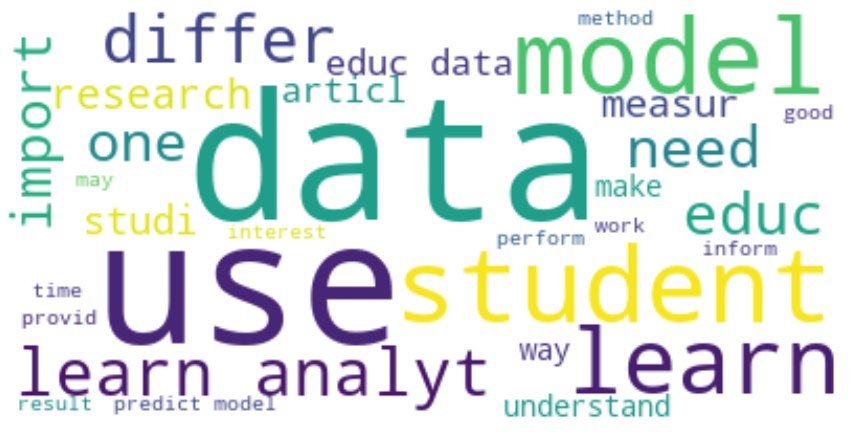

In [308]:
from wordcloud import WordCloud
# Generate the word cloud from the east_of_eden string
cloud_plainttext_stemmed = WordCloud(background_color="white",max_words=30,prefer_horizontal=0.9).generate(plainttext_stemmed)

# Create a figure of the generated cloud
plt.figure(figsize=(15,8))
plt.imshow(cloud_plainttext_stemmed, interpolation='bilinear')  
plt.axis('off')
# Display the figure
plt.show()

From the wordcloud, we could quickly capture the core heart of HUDK 4050: Data, Educatoin, Model and Analysis

### Merge with week list, so we have a variable representing weeks for each entry 

In [309]:
d3=pd.merge(all_data,data_week_list,on='Title',how='left')

# Sentiment Analysis
<a id='Sent'></a>
Match words in corpus to lexicons of positive & negative words<br>
<a href="#Back5">Back to the top</a>

In [310]:
#unite the word together to a processed document: lowercase, no punctuation, no numeric 
for i in d3.index:
    d3.Notes2[i]=' '.join(d3.Notes2[i])

In [311]:
#pip install -U textblob
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

d3['polarity'] = d3.Notes2.apply(pol)
d3['subjectivity'] = d3.Notes2.apply(sub)
d3.head()

,index,Key,Item Type,Publication Year,Author,Title,Publication Title,ISBN,ISSN,DOI,...,Code Number,Section,Session,Committee,History,Legislative Body,Notes2,week,polarity,subjectivity
0,0,VUSBL4SV,bookSection,2017.0,"Bergner, Yoav",Measurement and its Uses in Learning Analytics,The Handbook of Learning Analytics,978-0-9952408-0-3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,measur defin construct construct latent variab...,NaN,0.200000,0.355556
1,1,DL5YWRHE,bookSection,2017.0,"Prinsloo, Paul; Slade, Sharon",Ethics and Learning Analytics: Charting the (U...,The Handbook of Learning Analytics,978-0-9952408-0-3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ethic issu locat interpret data inform consent...,NaN,0.097937,0.376825
2,2,XL5U3D85,bookSection,2017.0,"Brooks, Christopher; Thompson, Craig",Predictive Modelling in Teaching and Learning,The Handbook of Learning Analytics,978-0-9952408-0-3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,process practic challeng use predict model tea...,NaN,0.300000,0.300000
3,3,UQPELAFR,bookSection,2017.0,"Liu, Ren; Koedinger, Kenneth",Going Beyond Better Data Prediction to Create ...,The Handbook of Learning Analytics,978-0-9952408-0-3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,predict vs explanatori model predict model aim...,NaN,0.213333,0.393333
4,4,FRSPRI7Y,journalArticle,2011.0,"Gelman, A; Niemi, J",Statistical graphics: making information clear...,Significance,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,two decis target audienc tri show guid princip...,NaN,0.000000,0.000000


In [312]:
d4=d3.groupby('week').polarity.mean().to_frame()
d4=d4.merge(d3.groupby('week').subjectivity.mean().to_frame(),on='week')
d4

,polarity,subjectivity
week,,
2.0,0.083601,0.356545
3.0,0.092293,0.433709
4.0,0.087429,0.365123
5.0,0.056307,0.259642
6.0,0.089550,0.309925
7.0,0.021786,0.265248
8.0,0.013825,0.273827
9.0,0.124944,0.367792
10.0,0.072038,0.287906


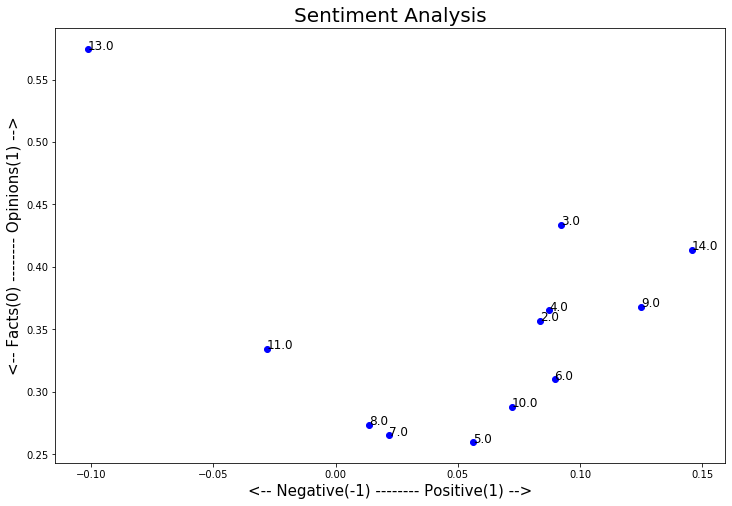

In [313]:
# Plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 8]

for index, week in enumerate(d4.index):
    x = d4.polarity.loc[week]
    y = d4.subjectivity.loc[week]
    plt.scatter(x, y, color='blue')
    plt.text(x, y, week, fontsize=12)

   
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative(-1) -------- Positive(1) -->', fontsize=15)
plt.ylabel('<-- Facts(0) -------- Opinions(1) -->', fontsize=15)

plt.show()

-By week, most of the weekly sentiments are slightly positive and more inclined to be fact than opinion, from which ,we could assume that students were rephrasing the content in the notes instead of building up their own understanding and own opinionated perspectives. This suggests that teachers could encourage students to be more of an active reader by putting in more of their thoughts based on the reading in the following semsters. <br><br>There are two outlier weeks, which are week 11 and week 13 with theme of Prediction and Detection, and Model evaluation respectively. The sentiments of the notes in these two weeks score slightly below zero regarding positivity, probably indicating some hardship doing prediction and detection and model evaluation in educational setting. However, the sentiment is so weak that we shall not pay too much attention to that.<br>
<br>

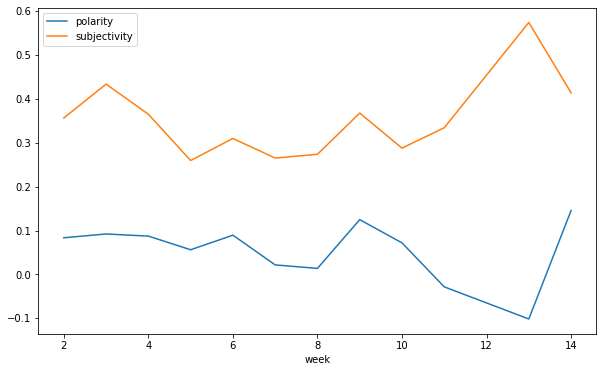

In [314]:
# Sentiment over time
d4.plot(figsize=(10,6))

 -The polarity remains constant close to the neutral line, slightly positive in the comments except for week 13. This week, Model evaluation, students have a lot of emotion to express in their notes, to some extent, slightly negative.<br><br>-In most of the week, the two lines, polarity and subjectivity rise and drop parallelly. Nontheless, starting from week 10, lines went in oppositie direction--- sujectivity went up and down later, while polarity went down first and then up.<br><br>This tells us that starting from week either the time factor or the themes or both affect the fluctuation of the sentiment.In week 13, the sujectivity has reached the peak whereas polarity declined to the lowest point. This reinforce the statement above that week 13 is sucjectively negative. Students's expecation about prospect of learning analytics has been discouraged or disappointed by the hardship in the real world application--prediction, feature selection and model evaluation.<br><br>

<a id='LDA'></a>
# LDA topic modelling

Since the dataframe data_week_list did not capture the core theme of every week based on the title, we have decided use the notes to help us decide.<br>
Practise on the notes to see if latent topics could be derived from the notes<br>
<a href="#Back6">Back to the top</a>

# Topic Modeling - (All Text by week)
<a id='ft'></a> 
<a href="#Back7">Back to the top</a>

In [315]:
d3.dropna(subset=['week'],inplace=True) #Define in 'week' column to look for missing values.

In [316]:
d5=d3.groupby('week').Notes2.apply(lambda x: ' '.join(x)).reset_index()
d5

,week,Notes2
0,2.0,lak vs edm similar defin reflect emerg dataint...
1,3.0,kindergarten need hour day clock homework key ...
2,4.0,technolog give educ data student abil custom t...
3,5.0,group learn taskworkteamwork process compon gt...
4,6.0,social network analysi sna social network basi...
5,7.0,data driven decis make power mean flood data o...
6,8.0,featur select knowledg discoveri interpret ins...
7,9.0,methodeepuphani assum onlin cours predefin ski...
8,10.0,detector assisr system gt colleg attend succes...
9,11.0,high failur rate math portugues languag busi i...


In [317]:
# Before we jump into the notes, we need to check out what titles exist in our data_week_list dataset
# These are the articles from the notes, those could not find a match in the data_week_list were excluded for analysis
current_title_list=pd.DataFrame(d3.Title.unique(),columns=['Title'])
current_title_list

,Title
0,Analyzing the Longitudinal K-12 Grading Histor...
1,Understanding Classrooms through Social Networ...
2,Why Students Should Own Their Educational Data
3,Knowledge tracing: Modeling the acquisition of...
4,Learning Analytics and Educational Data Mining...
5,Evaluating Machine Learning Models
6,Why Is Measuring Learning So Difficult?
7,Saturday Morning Breakfast Cereal
8,Data wranglers: human interpreters to help clo...
9,Feature Selection


In [318]:
current_title_list_week.Title.iloc[-7]

'Machine Beats Experts: Automatic Discovery of Skill Models for Data-Driven Online Course Refinement'

In [319]:
current_title_list_week=pd.merge(current_title_list,data_week_list,how='left',on='Title').sort_values(by='week')
current_title_list_week

,Title,week
4,Learning Analytics and Educational Data Mining...,2
11,RStudio Cheat Sheets,2
6,Why Is Measuring Learning So Difficult?,2
13,Translating Learning into Numbers: A Generic F...,3
7,Saturday Morning Breakfast Cereal,3
10,Chapter 1: Social Network Data,4
2,Why Students Should Own Their Educational Data,4
8,Data wranglers: human interpreters to help clo...,4
14,The Big Five and Visualisations of Team Work A...,5
20,Cross Validation,5


After a brief screening of this weekly title, we found approximately 10 theme across the semester

In [320]:
summary={'week':[2,3,4,5,6,7,8,9,10,11,13,14],'theme':['LAK & EDM or Measuring','Framework of LA','Social Network','Visaul or Cross Validation','Social Network','Cluster Analysis','Recommendation or Feature Selection','Machine-aided Online Learning Solution','Big data edu','Prediction and detection','Model Evaluation','Knowledge Tracing']}

In [321]:
# Summarize the theme and save for later comparison
summary_df=pd.DataFrame(data=summary)
summary_df

,week,theme
0,2,LAK & EDM or Measuring
1,3,Framework of LA
2,4,Social Network
3,5,Visaul or Cross Validation
4,6,Social Network
5,7,Cluster Analysis
6,8,Recommendation or Feature Selection
7,9,Machine-aided Online Learning Solution
8,10,Big data edu
9,11,Prediction and detection


In [322]:
# tokenize the text
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_df=0.9, min_df=2, stop_words='english') # ignore terms that take up 90% of the pool and that appear only twice
doc_term_matrix = count_vect.fit_transform(d5.Notes2.values.astype('U'))

In [323]:
# input lda model from sklearn.decomposition
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=5, random_state=42)# specify number of topics in the n_components argument
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [324]:
# since in the lda model we have specify 5 topics to be generated, lets check out the first one
first_topic = LDA.components_[0] # a list of weight for each feature

top_topic_words = first_topic.argsort()[-10:] # find the 10 largest weighed features in topic 
# argsort() will return the current indice based on the sequence after sorting(small to large)
#  >>> x = np.array([3, 1, 2])
#  >>> np.argsort(x)

#      array([1, 2, 0])
    

for i in top_topic_words:
    print(count_vect.get_feature_names()[i])

framework
game
commun
classif
class
learner
metric
la
lak
edm


In [325]:
# write two for loop the extract and print out topics and their top 10 words
for k in range(len(LDA.components_)):
    print(('Topic {}').format(k+1))
    ntopic=LDA.components_[k]
    top_topic_words_index = ntopic.argsort()[-10:]
    for i in top_topic_words_index:
        print(count_vect.get_feature_names()[i])
    print('-------------------------')

Topic 1
framework
game
commun
classif
class
learner
metric
la
lak
edm
-------------------------
Topic 2
classroom
node
popul
connect
sna
tie
relationship
social
actor
network
-------------------------
Topic 3
correl
trace
probabl
variabl
tutor
rule
cluster
item
cours
skill
-------------------------
Topic 4
design
decis
action
sampl
hierarch
visual
teacher
school
grade
cluster
-------------------------
Topic 5
train
track
recommend
program
gain
mooc
complet
team
featur
cours
-------------------------


In [326]:
# write a for loop the extract and print out topics and their top 10 words
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i+1}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #1:
['framework', 'game', 'commun', 'classif', 'class', 'learner', 'metric', 'la', 'lak', 'edm']


Top 10 words for topic #2:
['classroom', 'node', 'popul', 'connect', 'sna', 'tie', 'relationship', 'social', 'actor', 'network']


Top 10 words for topic #3:
['correl', 'trace', 'probabl', 'variabl', 'tutor', 'rule', 'cluster', 'item', 'cours', 'skill']


Top 10 words for topic #4:
['design', 'decis', 'action', 'sampl', 'hierarch', 'visual', 'teacher', 'school', 'grade', 'cluster']


Top 10 words for topic #5:
['train', 'track', 'recommend', 'program', 'gain', 'mooc', 'complet', 'team', 'featur', 'cours']




- Topic 1 : Learning analytics (framework) and education data mining<br>
- Topic 2 : Social Network Analysis<br> 
- Topic 3 : Cluster analysis<br>
- Topic 4 : Hierarchical Cluster Analysis
- Topic 5 : Feature Training? Something related to online learning program

There could be more. So we are going to try directly with 10 topics and downwards if it's not applicable.

In [327]:
# Try 10 topics

LDA_10 = LatentDirichletAllocation(n_components=10, random_state=42)# specify number of topics in the n_components argument
LDA_10.fit(doc_term_matrix)

# write a for loop the extract and print out topics and their top 10 words
for i,topic in enumerate(LDA_10.components_):
    print(f'Top 10 words for topic #{i+1}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #1:
['curv', 'correct', 'machin', 'regress', 'school', 'accuraci', 'game', 'class', 'classif', 'metric']


Top 10 words for topic #2:
['tune', 'happi', 'member', 'multivari', 'personnel', 'theori', 'accept', 'pitfal', 'elementari', 'composit']


Top 10 words for topic #3:
['probabl', 'correl', 'trace', 'variabl', 'tutor', 'rule', 'item', 'cluster', 'cours', 'skill']


Top 10 words for topic #4:
['driven', 'histori', 'longitudin', 'teacher', 'decis', 'hierarch', 'visual', 'school', 'grade', 'cluster']


Top 10 words for topic #5:
['tune', 'happi', 'member', 'multivari', 'personnel', 'theori', 'accept', 'pitfal', 'elementari', 'composit']


Top 10 words for topic #6:
['sampl', 'node', 'sna', 'connect', 'tie', 'relationship', 'popul', 'social', 'actor', 'network']


Top 10 words for topic #7:
['tune', 'happi', 'member', 'multivari', 'personnel', 'theori', 'accept', 'pitfal', 'elementari', 'composit']


Top 10 words for topic #8:
['curs', 'facetofac', 'track', 'recom

There are overlapped allocation of the topics, thus requiring us to reduce the number of components/ topics

In [328]:
# Try 6 topics

LDA_6 = LatentDirichletAllocation(n_components=6, random_state=42)# specify number of topics in the n_components argument
LDA_6.fit(doc_term_matrix)

# write a for loop the extract and print out topics and their top 10 words
for i,topic in enumerate(LDA_6.components_):
    print(f'Top 10 words for topic #{i+1}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #1:
['dimens', 'school', 'machin', 'framework', 'accuraci', 'game', 'classif', 'class', 'la', 'metric']


Top 10 words for topic #2:
['collabor', 'cultur', 'focu', 'difficult', 'discoveri', 'autom', 'learner', 'commun', 'lak', 'edm']


Top 10 words for topic #3:
['probabl', 'correl', 'trace', 'variabl', 'tutor', 'rule', 'item', 'cluster', 'cours', 'skill']


Top 10 words for topic #4:
['identifi', 'longitudin', 'histori', 'teacher', 'decis', 'hierarch', 'visual', 'school', 'grade', 'cluster']


Top 10 words for topic #5:
['train', 'track', 'recommend', 'program', 'gain', 'mooc', 'complet', 'team', 'featur', 'cours']


Top 10 words for topic #6:
['node', 'sampl', 'sna', 'connect', 'tie', 'popul', 'relationship', 'social', 'actor', 'network']




In [329]:
summary_df

,week,theme
0,2,LAK & EDM or Measuring
1,3,Framework of LA
2,4,Social Network
3,5,Visaul or Cross Validation
4,6,Social Network
5,7,Cluster Analysis
6,8,Recommendation or Feature Selection
7,9,Machine-aided Online Learning Solution
8,10,Big data edu
9,11,Prediction and detection


In [330]:
# Try 7 topics
LDA_7 = LatentDirichletAllocation(n_components=7, random_state=42)# specify number of topics in the n_components argument
LDA_7.fit(doc_term_matrix)

# write a for loop the extract and print out topics and their top 10 words
for i,topic in enumerate(LDA_7.components_):
    print(f'Top 10 words for topic #{i+1}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #1:
['dimens', 'school', 'machin', 'framework', 'accuraci', 'game', 'classif', 'class', 'la', 'metric']


Top 10 words for topic #2:
['approach', 'design', 'feedback', 'analyst', 'action', 'sampl', 'popul', 'social', 'actor', 'network']


Top 10 words for topic #3:
['probabl', 'correl', 'trace', 'variabl', 'tutor', 'rule', 'item', 'cluster', 'cours', 'skill']


Top 10 words for topic #4:
['identifi', 'train', 'teacher', 'decis', 'hierarch', 'team', 'visual', 'school', 'grade', 'cluster']


Top 10 words for topic #5:
['curs', 'facetofac', 'track', 'recommend', 'program', 'gain', 'mooc', 'complet', 'featur', 'cours']


Top 10 words for topic #6:
['influenc', 'connect', 'central', 'classroom', 'tie', 'sna', 'relationship', 'social', 'actor', 'network']


Top 10 words for topic #7:
['collabor', 'cultur', 'focu', 'difficult', 'discoveri', 'autom', 'learner', 'commun', 'lak', 'edm']




In [331]:
# Try 8 topics
LDA_8 = LatentDirichletAllocation(n_components=8, random_state=42)# specify number of topics in the n_components argument
LDA_8.fit(doc_term_matrix)

# write a for loop the extract and print out topics and their top 10 words
for i,topic in enumerate(LDA_8.components_):
    print(f'Top 10 words for topic #{i+1}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #1:
['dimens', 'school', 'machin', 'framework', 'accuraci', 'game', 'classif', 'class', 'la', 'metric']


Top 10 words for topic #2:
['impact', 'conclud', 'consist', 'strengthen', 'web', 'intent', 'regular', 'intuit', 'dimension', 'mirror']


Top 10 words for topic #3:
['probabl', 'correl', 'trace', 'variabl', 'tutor', 'rule', 'item', 'cluster', 'cours', 'skill']


Top 10 words for topic #4:
['identifi', 'longitudin', 'histori', 'teacher', 'decis', 'hierarch', 'visual', 'school', 'grade', 'cluster']


Top 10 words for topic #5:
['teamwork', 'visualis', 'interact', 'cross', 'visual', 'member', 'valid', 'activ', 'train', 'team']


Top 10 words for topic #6:
['node', 'sampl', 'sna', 'connect', 'tie', 'relationship', 'popul', 'social', 'actor', 'network']


Top 10 words for topic #7:
['collabor', 'cultur', 'focu', 'difficult', 'discoveri', 'autom', 'learner', 'commun', 'lak', 'edm']


Top 10 words for topic #8:
['curs', 'facetofac', 'track', 'recommend', 'program', '

-Topic 1: Framework of LA<br> 
-Topic 2: Web-based Online learning<br>
-Topic 3: Cluster Analysis<br>
-Topic 4: Hierarchical Cluster Analysis(HCA)<br>
-Topic 5: Visaul or Cross Validation<br>
-Topic 6: Social Network<br>
-Topic 7: LAK & EDM<br>
-Topic 8: Recommendation or Feature Selection<br>


In [332]:
# Put the result topics 
eight_topics={'topic':[1,2,3,4,5,6,7,8],'theme':['Framework of LA','Web-based Online learning','Cluster Analysis','HCA','Visaul or Cross Validation','Social Network','LAK & EDM or Measuring','Recommendation or Feature Selection']}

In [333]:
eight_topics_df=pd.DataFrame(eight_topics)
eight_topics_df

,topic,theme
0,1,Framework of LA
1,2,Web-based Online learning
2,3,Cluster Analysis
3,4,HCA
4,5,Visaul or Cross Validation
5,6,Social Network
6,7,LAK & EDM or Measuring
7,8,Recommendation or Feature Selection


In [334]:
topic_values = LDA_8.transform(doc_term_matrix)
topic_values

array([[2.80052143e-05, 2.79705213e-05, 2.80071923e-05, 2.80105142e-05,
        2.79997971e-05, 2.80140624e-05, 9.98455258e-01, 1.37673435e-03],
       [8.97939454e-01, 2.87555658e-05, 2.88026247e-05, 2.88035162e-05,
        2.88007297e-05, 5.75441301e-02, 4.43724499e-02, 2.88032420e-05],
       [1.68399905e-05, 1.68101635e-05, 1.68390098e-05, 1.15924621e-03,
        1.68359182e-05, 9.98739747e-01, 1.68390921e-05, 1.68425434e-05],
       [7.51458072e-05, 7.50751602e-05, 7.51452197e-05, 7.51217802e-05,
        9.99474086e-01, 7.51586790e-05, 7.51345364e-05, 7.51332039e-05],
       [3.08293510e-05, 3.07958349e-05, 3.08274301e-05, 3.08528286e-05,
        3.08311316e-05, 9.99784207e-01, 3.08268110e-05, 3.08292362e-05],
       [4.59629669e-05, 4.59221730e-05, 4.59607188e-05, 9.99678304e-01,
        4.59552155e-05, 4.59748652e-05, 4.59599843e-05, 4.59598302e-05],
       [3.73788672e-05, 3.73357848e-05, 3.73826951e-05, 3.73671033e-05,
        3.73735709e-05, 3.73835860e-05, 3.73779852e-05, 9.

In [335]:
# Extract top two most likely topics
d5['topic1']=topic_values.argmax(axis=1)+1
d5['topic2']=topic_values.argsort(axis=1)[:,-2]+1 # the last but second column is the second largesr value
d5

,week,Notes2,topic1,topic2
0,2.0,lak vs edm similar defin reflect emerg dataint...,7,8
1,3.0,kindergarten need hour day clock homework key ...,1,6
2,4.0,technolog give educ data student abil custom t...,6,4
3,5.0,group learn taskworkteamwork process compon gt...,5,6
4,6.0,social network analysi sna social network basi...,6,4
5,7.0,data driven decis make power mean flood data o...,4,6
6,8.0,featur select knowledg discoveri interpret ins...,8,6
7,9.0,methodeepuphani assum onlin cours predefin ski...,3,8
8,10.0,detector assisr system gt colleg attend succes...,3,1
9,11.0,high failur rate math portugues languag busi i...,1,3


<a id='compare'></a>
## Comparison
<a href="#Back14">Back to the top</a>

In [336]:
#Compare the result
d6=pd.merge(d5,summary_df,on='week')
d6=d6.rename(columns={'theme':'theme_title'})
d6

,week,Notes2,topic1,topic2,theme_title
0,2.0,lak vs edm similar defin reflect emerg dataint...,7,8,LAK & EDM or Measuring
1,3.0,kindergarten need hour day clock homework key ...,1,6,Framework of LA
2,4.0,technolog give educ data student abil custom t...,6,4,Social Network
3,5.0,group learn taskworkteamwork process compon gt...,5,6,Visaul or Cross Validation
4,6.0,social network analysi sna social network basi...,6,4,Social Network
5,7.0,data driven decis make power mean flood data o...,4,6,Cluster Analysis
6,8.0,featur select knowledg discoveri interpret ins...,8,6,Recommendation or Feature Selection
7,9.0,methodeepuphani assum onlin cours predefin ski...,3,8,Machine-aided Online Learning Solution
8,10.0,detector assisr system gt colleg attend succes...,3,1,Big data edu
9,11.0,high failur rate math portugues languag busi i...,1,3,Prediction and detection


In [337]:
d7=pd.merge(d6,eight_topics_df,left_on='topic1',right_on='topic')
d7=d7.drop(columns='topic')
d7=d7.rename(columns={'theme':'theme_1'})

d7=pd.merge(d7,eight_topics_df,left_on='topic2',right_on='topic')
d7=d7.drop(columns='topic')
d7=d7.rename(columns={'theme':'theme_2'})
d7.sort_values(by='week')

,week,Notes2,topic1,topic2,theme_title,theme_1,theme_2
0,2.0,lak vs edm similar defin reflect emerg dataint...,7,8,LAK & EDM or Measuring,LAK & EDM or Measuring,Recommendation or Feature Selection
2,3.0,kindergarten need hour day clock homework key ...,1,6,Framework of LA,Framework of LA,Social Network
8,4.0,technolog give educ data student abil custom t...,6,4,Social Network,Social Network,HCA
3,5.0,group learn taskworkteamwork process compon gt...,5,6,Visaul or Cross Validation,Visaul or Cross Validation,Social Network
9,6.0,social network analysi sna social network basi...,6,4,Social Network,Social Network,HCA
4,7.0,data driven decis make power mean flood data o...,4,6,Cluster Analysis,HCA,Social Network
5,8.0,featur select knowledg discoveri interpret ins...,8,6,Recommendation or Feature Selection,Recommendation or Feature Selection,Social Network
1,9.0,methodeepuphani assum onlin cours predefin ski...,3,8,Machine-aided Online Learning Solution,Cluster Analysis,Recommendation or Feature Selection
10,10.0,detector assisr system gt colleg attend succes...,3,1,Big data edu,Cluster Analysis,Framework of LA
6,11.0,high failur rate math portugues languag busi i...,1,3,Prediction and detection,Framework of LA,Cluster Analysis


<a id='conclusions'></a>
# Conclusion
<a href="#Back13">Back to the top</a>

1. -From the wordcloud, we could quickly capture the core heart of HUDK 4050: Data, Educatoin, Model and Analysis
<br><br>
2. -By week, most of the weekly sentiments are slightly positive and more inclined to be fact than opinion, from which ,we could assume that students were rephrasing the content in the notes instead of building up their own understanding and own opinionated perspectives. This suggests that teachers could encourage students to be more of an active reader by putting in more of their thoughts based on the reading in the following semsters. <br><br>There are two outlier weeks, which are week 11 and week 13 with theme of Prediction and Detection, and Model evaluation respectively. The sentiments of the notes in these two weeks score slightly below zero regarding positivity, probably indicating some hardship doing prediction and detection and model evaluation in educational setting. However, the sentiment is so weak that we shall not pay too much attention to that.<br>
<br>
3. -The polarity remains constant close to the neutral line, slightly positive in the comments except for week 13. This week, Model evaluation, students have a lot of emotion to express in their notes, to some extent, slightly negative.<br><br>-In most of the week, the two lines, polarity and subjectivity rise and drop parallelly. Nontheless, starting from week 10, lines went in oppositie direction--- sujectivity went up and down later, while polarity went down first and then up.<br><br>This tells us that starting from week either the time factor or the themes or both affect the fluctuation of the sentiment.In week 13, the sujectivity has reached the peak whereas polarity declined to the lowest point. This reinforce the statement above that week 13 is sucjectively negative. Students's expecation about prospect of learning analytics has been discouraged or disappointed by the hardship in the real world application--prediction, feature selection and model evaluation.<br><br>

4. -After trying several numbers of topic in the LDA model, we have concluded that 8 is the optimal number for modeling these weekly notes.<br> - The comaprsion table also gives us a constrasting view of how the notes reflect the weekly themes. The result is quite promising, 8 out of the 12 pre-set themes are 100% matched with the model outcome. The rest of the themes (5) although are not matched perfectly, the assigned outcome could still be valid due to the overlapped content and dicusssion direction.